In [1]:
import numpy as np

# 1. Mon premier est ... linéaire !

In [86]:
class Loss(object):
    def forward(self, y, yhat):
        pass

    def backward(self, y, yhat):
        pass

class MSELoss(Loss):
    def forward(self, y, yhat):
        f = np.mean(np.power(y-yhat, 2), axis=1)
        return f

    def backward(self, y, yhat):
        g = (2/len(y))*(yhat-y)
        return g
    
class MSELoss2(Loss):
    def forward(self, y, yhat):
        f = np.mean(np.power(y-yhat, 2), axis=1)/2
        return f

    def backward(self, y, yhat):
        g = (yhat-y)y.shape[0]
        return g
        

class Module(object):
    def __init__(self):
        self._parameters = None
        self._gradient = None

    def zero_grad(self):
        ## Annule gradient
        pass

    def forward(self, X):
        ## Calcule la passe forward
        pass

    def update_parameters(self, gradient_step=1e-3):
        ## Calcule la mise a jour des parametres selon le gradient calcule et le pas de gradient_step
        self._parameters -= gradient_step*self._gradient

    def backward_update_gradient(self, input, delta):
        ## Met a jour la valeur du gradient
        pass

    def backward_delta(self, input, delta):
        ## Calcul la derivee de l'erreur
        pass
    
class LinearModule(Module):
    """
    N : la taille du mini-batch
    d : le nombre de dimensions d'un échantillon
    d' : le nombre de neurones dans le module
    """

    def __init__(self, d, dprime, N):
        Module.__init__(self)
        self.W = np.random.rand(d, dprime) #W est de taille d*d'
        self.b = np.random.rand(1, dprime) #b est de taille 1*d' (on réplique N fois la première ligne par broadcasting lors des opérations)
        self.gradientW = None
        self.gradientb = None

    def zero_grad(self):
        #Annule gradient
        self.gradientW = None
        self.gradientb = None

    def forward(self, X):
        ## Calcule la passe forward
        self.entre = X
        forwa = X@self.W + self.b
        return forwa

    def update_parameters(self, gradient_step=1e-3):
        ## Calcule la mise a jour des parametres selon le gradient calcule et le pas de gradient_step
        self.W -= gradient_step * self.gradientW
        self.b -= gradient_step * self.gradientb
        #self._parameters = [self.W, self.b]

    def backward_update_gradient(self, entre, delta_sortie):
        ## Calcule le gradient du coût par rapport aux paramètres et l’additionne au gradient (gradientW et gradientb)
        # - en fonction de l’entrée input et des δ de la couche suivante delta
        # Fait une moyenne sur les échantillons
        n = entre.shape[0]
        self.gradientW = (entre.T@delta_sortie)/n 
        self.gradientb = np.sum(delta_sortie,axis=0,keepdims=True)/n

    def backward_delta(self, entre, delta_sortie):
        ## Calcule le gradient du coût par rapport aux entrées en fonction de l’entrée "input" =error et des deltas de la couche suivante "delta"
        back = delta_sortie@self.W.T
        return back

## Tests module linéaire

# 2. Mon second est ... non-linéaire !

In [72]:
class TanH(Module):

    def __init__(self):
        Module.__init__(self)
        #self.b = stretch_vect(np.random.rand(1, d), N) 

    def zero_grad(self):
        #Annule gradient
        self.gradientW = None
        self.gradientb = None

    def forward(self, X):
        ## Calcule la passe forward
        self.input = X
        return np.tanh(X)

    def update_parameters(self, gradient_step=1e-3):
        ## il n'y a pas de paramètres à mettre a jour
        pass 
        

    def backward_update_gradient(self, input, delta):
        ## il n'y a pas de paramètres à mettre a jour
        pass

    def backward_delta(self, input, delta):
        ## Calcule le gradient du coût par rapport aux entrées en fonction de l’entrée "input" et des deltas de la couche suivante "delta"
        return (1-np.tanh(input)**2) * delta
    
class Sigmoide(Module):

    def __init__(self):
        Module.__init__(self)
        #self.b = stretch_vect(np.random.rand(1, d), N)

    def zero_grad(self):
        ## Annule gradient
        self.gradientW = None
        self.gradientb = None

    def forward(self, X):
        ## Calcule la passe forward
        self.input = X
        return 1/(1 + np.exp(-X)) #+self.b #il faut que X soit un np array (-X)

    def update_parameters(self, gradient_step=1e-3):
        ## il n'y a pas de paramètres à mettre a jour
        pass 
        

    def backward_update_gradient(self, input, delta):
        ## il n'y a pas de paramètres à mettre a jour
        pass

    def backward_delta(self, input, delta):
        return forward(input) * (1-forward(input))
        ## Calcule le gradient du coût par rapport aux entrées en fonction de l’entrée "input" et des deltas de la couche suivante "delta"
        #return prod_mat(stretch_vect(delta, len(input)),div_mat(np.exp(-input), 1+np.exp(-input)))

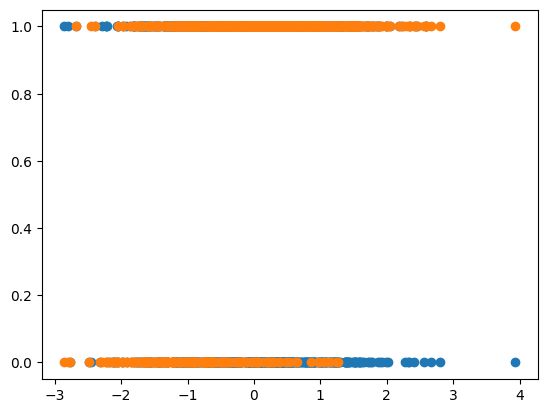

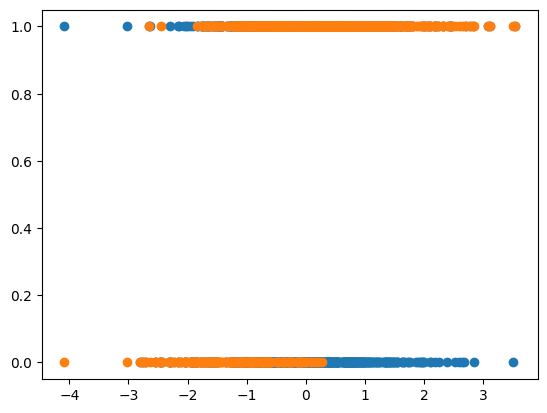

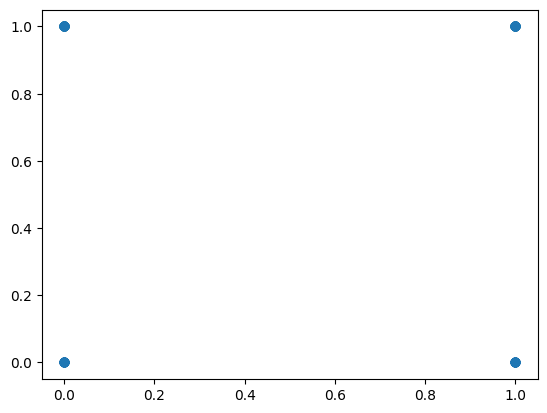

0.49


In [132]:
input_layer_size = 2
output_layer_size = 1
X = np.random.randn(1000, input_layer_size)
y = np.random.randint(2, size=(1000, output_layer_size))

X_train = X[0:800,:]
y_train = y[0:800,:]
X_test = X[800:0]
y_test = y[800:0]

ml = LinearModule(2,1,100)
al = Sigmoide()
for i in range(1000):
    ml.zero_grad()
    yhat= al.forward(ml.forward(X))
    mse = MSELoss()
    grad_error = mse.backward(y,yhat)
    grad_delta = ml.backward_delta(X,grad_error)
    ml.backward_update_gradient(X,grad_error)
    ml.update_parameters()
yo = np.where(yhat>=0.5,1,0)

plt.scatter(X[:,0],y)
plt.scatter(X[:,0],yo)
plt.show()
plt.scatter(X[:,1],y)
plt.scatter(X[:,1],yo)
plt.show()


input_layer_size = 2
output_layer_size = 1
X = np.random.randn(1000, input_layer_size)
y = np.random.randint(2, size=(1000, output_layer_size))

X_train = X[0:800,:]
y_train = y[0:800,:]
X_test = X[800:]
y_test = y[800:]

ml = LinearModule(2,1,100)
al = TanH()
for i in range(1000):
    ml.zero_grad()
    yhat= al.forward(ml.forward(X_train))
    mse = MSELoss()
    grad_error = mse.backward(y_train,yhat)
    grad_delta = ml.backward_delta(X_train,grad_error)
    ml.backward_update_gradient(X_train,grad_error)
    ml.update_parameters()
#yo = np.where(yhat>=0.5,1,0)
t = X_test@ml.W + ml.b
predict = al.forward(ml.forward(X_test))
predict = np.where(predict>=0.5,1,0)
plt.scatter(y_test,predict)
plt.show()

score = np.mean(np.where(y_test==predict,1,0))
print(score)

In [7]:
class Sequentiel(object):
    def __init__(self):
        self.layers = []
    
    def add(self, layer):
        self.layers.append(layer)

class Optim(object):
    def __init__(self, net, loss, eps):
        self.net = net
        self.loss = loss
        self.eps = eps
    
    def step(self, batch_x, batch_y):
        output = batch_x
        for layer in self.net.layers:
            output = layer.forward(output)
        cost = self.loss.forward(batch_y, output)
        delta = self.loss.backward(batch_y, output)
        for layer in reversed(self.net.layers):
            layer.backward_update_gradient(layer.input, delta)
            delta = layer.backward_delta(layer.input, delta)
            layer.update_parameters(gradient_step=self.eps)

class SGD():
    def __init__(self,training_data, net, t_batch, epochs, loss, eps):
        self.net = net
        self.X_train = training_data[0]
        self.y_train = training_data[0]
        self.training_data = training_data
        self.t_batch = t_batch
        self.epochs = epochs
        self.loss = loss
        self.eps = eps

    
    def train(self):
        n=self.X_train[0]
        for i in range(self.epochs):
            p = np.random.permutation(self.X_train.shape[0])
            self.X_train, self.y_train = self.X_train[p], self.y_train[p]
            mini_batches_X = [self.X_train[k:k+self.t_batch] for k in range(0, n, self.t_batch)]
            mini_batches_y = [self.y_train[k:k+self.t_batch] for k in range(0, n, self.t_batch)]
            for mini_batch_X, mini_batch_y in zip(mini_batches_X, mini_batches_y):
                opt = Optim(self.net,loss,)
                opt.step(mini_batch_X, mini_batch_y)






ml = LinearModule(2,1,100)
al = TanH()
for i in range(1000):
    ml.zero_grad()
    yhat= al.forward(ml.forward(X_train))
    mse = MSELoss()
    grad_error = mse.backward(y_train,yhat)
    grad_delta = ml.backward_delta(X_train,grad_error)
    ml.backward_update_gradient(X_train,grad_error)
    ml.update_parameters()
#yo = np.where(yhat>=0.5,1,0)
t = X_test@ml.W + ml.b
predict = al.forward(ml.forward(X_test))
predict = np.where(predict>=0.5,1,0)


In [136]:
randomize = np.arange(10)
np.random.shuffle(randomize)
print(randomize)
print(X_train)
print(X_train[randomize])

[2 0 1 4 9 7 5 6 3 8]
[[ 0.88399184  0.75971586]
 [-2.89472017  0.10405924]
 [ 0.33886566  3.0251005 ]
 ...
 [ 1.1857147  -1.36676973]
 [ 1.96278564 -0.28397936]
 [ 1.87556341  1.77090916]]
[[ 0.33886566  3.0251005 ]
 [ 0.88399184  0.75971586]
 [-2.89472017  0.10405924]
 [ 1.23850769  0.82511541]
 [-1.08949335 -1.62624041]
 [ 0.59055208  1.68467526]
 [-2.88975695 -1.0937578 ]
 [-0.48625454  0.11801624]
 [ 0.81506894  0.86374275]
 [-0.63495563 -0.43100438]]


In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(self.layers[i], self.layers[i-1]) for i in range(1,len(self.layers))]
    
    def predict(self, X):
        h = X.T
        for i in range(len(self.weights)):
            h = self.sigmoid(np.dot(self.weights[i], h))
        return h
    
    def train(self, X, y, epochs, alpha):
        for i in range(epochs):
            activations = [X.T]
            a = X.T
            for j in range(len(self.weights)):
                z = np.dot(self.weights[j], a)
                a = self.sigmoid(z)
                activations.append(a)
            
            error = y.T - a
            delta = error * self.sigmoid_derivative(activations[-1])
            deltas = [delta]
            
            for k in range(len(activations)-2, 0, -1):
                delta = np.dot(self.weights[k].T, delta) * self.sigmoid_derivative(activations[k])
                deltas.append(delta)
                
            deltas.reverse()
            
            for l in range(len(self.weights)):
                self.weights[l] += alpha * np.dot(deltas[l], activations[l].T)
    
# Example usage:
input_layer_size = 4
hidden_layer_size = 8
output_layer_size = 1
nn = NeuralNetwork([input_layer_size, hidden_layer_size, output_layer_size])
X_train = np.random.randn(1000, input_layer_size)
y_train = np.random.randint(2, size=(1000, output_layer_size))
nn.train(X_train, y_train, epochs=1000, alpha=0.1)

# Generate some test data
X_test = np.random.randn(100, input_layer_size)
y_test = np.random.randint(2, size=(100, output_layer_size))

# Train the neural network
nn.train(X_train, y_train, epochs=1000, alpha=0.1)

# Make predictions on test data
y_pred = nn.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(np.round(y_pred.T) == y_test)
print("Accuracy: ", accuracy)



Accuracy:  0.53
